# Pre processing

C:\Users\mysel\AppData\Local\Temp\ipykernel_8608\77241425.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\mysel\AppData\Local\Temp\ipykernel_8608\77241425.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   engine           188533 non-null  object 
 1   power            188533 non-null  float64
 2   engine_capacity  188533 non-null  float64
dtypes: float64(2), object(1)
memory usage: 4.3+ MB
None
[2.   3.   3.5  4.8  3.8  5.5  3.3  3.7  4.6  4.   5.   6.7  1.5  2.5
 5.7  6.   6.2  3.6  2.3  4.4  2.7  5.3  2.4  5.6  4.7  1.6  6.8  5.4
 3.2  1.8  6.5  7.   3.9  3.4  6.3  2.9  6.6  0.65 4.3  8.3  5.2  4.2
 6.4  2.1  1.4  6.1  7.4  7.3  4.5  2.2  1.2  5.9  2.8  6.75 8.   8.4
 5.8  1.3  1.7  8.1  1.  ]

--- Training Set EDA ---

Dataset shape: (188533, 17)

Missing values:
id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type           0
engine              0
transmission        0
ext_col             0
int_col             0

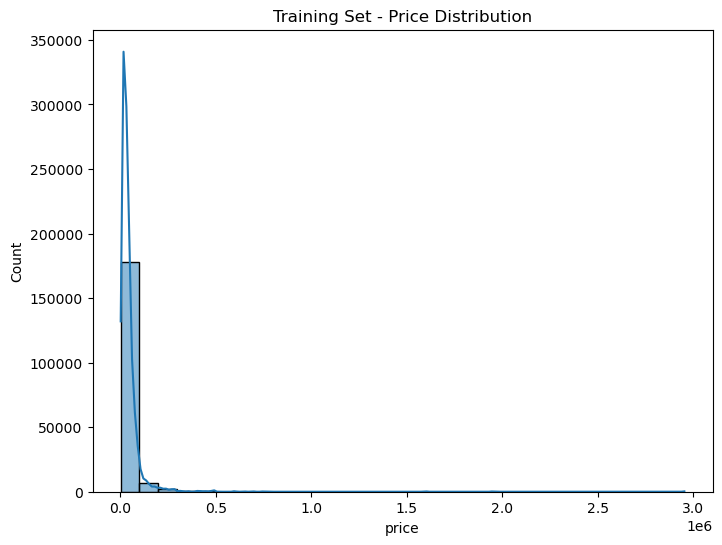

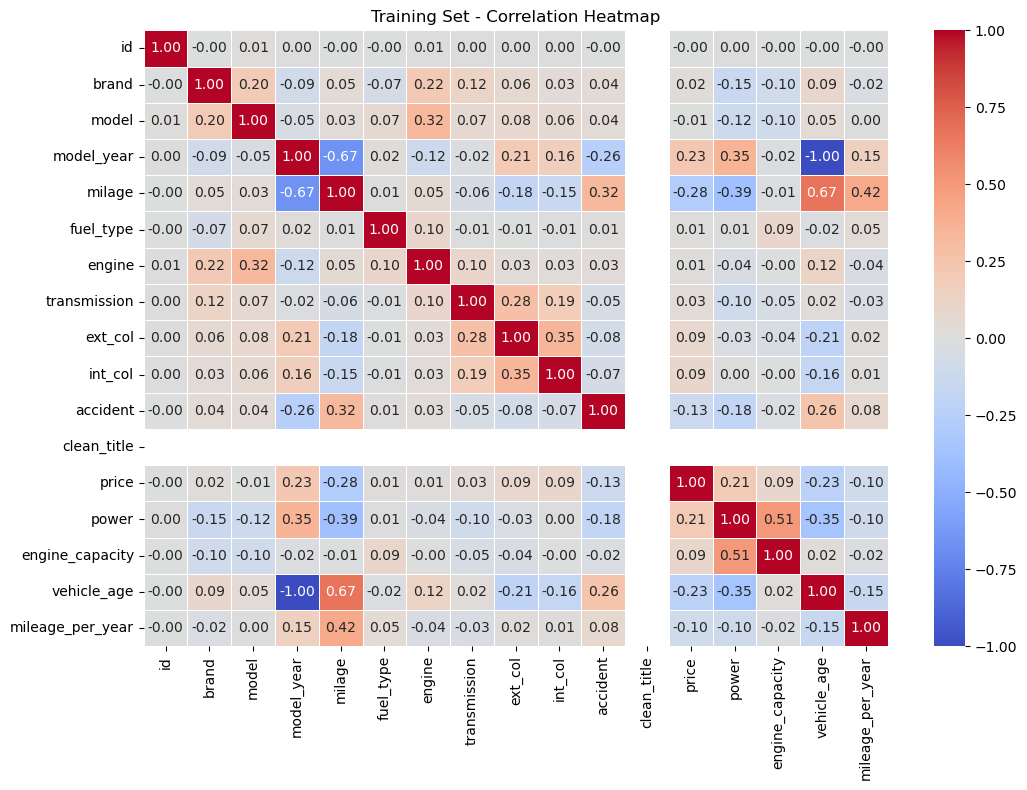


Highly Correlated Features (>0.85) in Training Set:
Feature Pair: model_year and vehicle_age | Correlation: -1.00

--- Test Set EDA ---

Dataset shape: (125690, 16)

Missing values:
id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type           0
engine              0
transmission        0
ext_col             0
int_col             0
accident            0
clean_title         0
power               0
engine_capacity     0
vehicle_age         0
mileage_per_year    0
dtype: int64


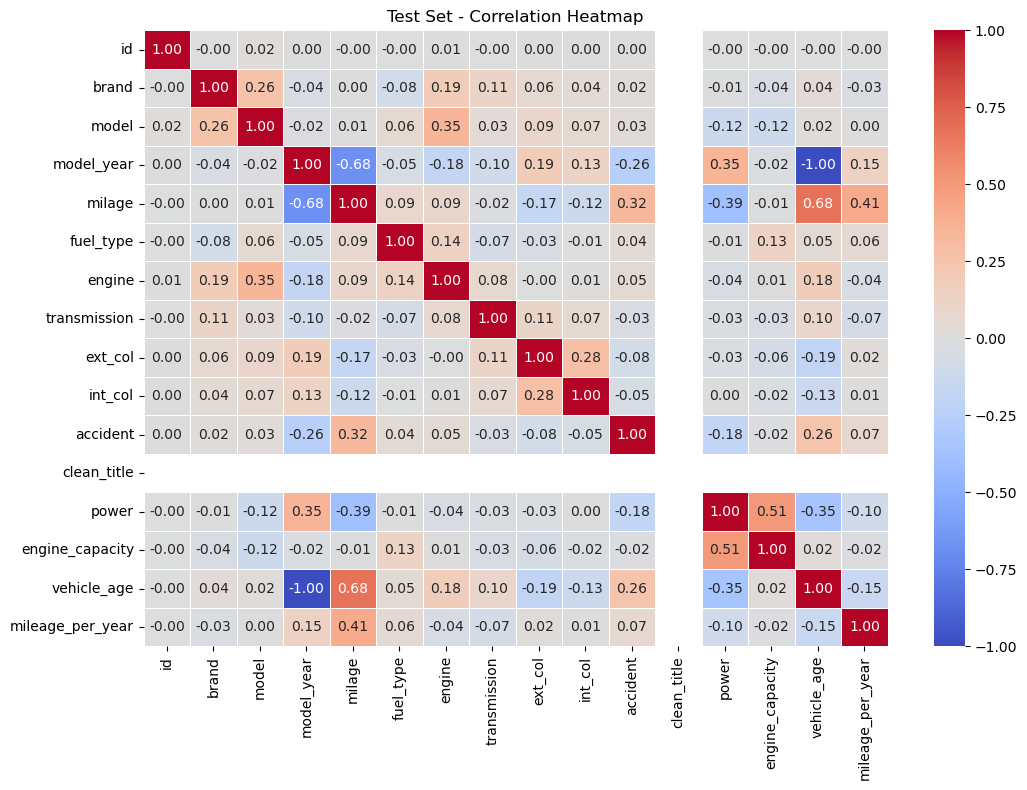


Highly Correlated Features (>0.85) in Test Set:
Feature Pair: model_year and vehicle_age | Correlation: -1.00

Removed 1 highly correlated features: {'vehicle_age'}

Remaining columns in Training Set: Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'power', 'engine_capacity', 'mileage_per_year'],
      dtype='object')


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import re
import datetime
from datetime import datetime

# Load data
df_train = pd.read_csv(r"C:\Users\mysel\Machine Learning\Regression\train.csv")
df_test = pd.read_csv(r"C:\Users\mysel\Machine Learning\Regression\test.csv")

# Fill NaNs: mean for numeric, mode for categorical
def fill_nulls(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
    return df

# Extract horsepower (HP) and engine capacity (L) from 'engine' column
def extract_engine_data(df):
    df['power'] = pd.to_numeric(df['engine'].str.extract(r'(\d+\.?\d*)\s*[Hh][Pp]')[0], errors='coerce')
    df['engine_capacity'] = pd.to_numeric(df['engine'].str.extract(r'(\d+\.?\d*)\s*[Ll]')[0], errors='coerce')
    return df

df_train = extract_engine_data(df_train)
df_test = extract_engine_data(df_test)

# Assuming df is your DataFrame
current_year = datetime.now().year

# Create vehicle age
df_train['vehicle_age'] = current_year - df_train['model_year']

# Create mileage per year, handling any potential zero-division cases for new vehicles
df_train['mileage_per_year'] = df_train['milage'] / df_train['vehicle_age'].replace(0, 1)  # Avoid division by zero by replacing 0 age with 1


# Assuming df is your DataFrame
current_year = datetime.now().year

# Create vehicle age
df_test['vehicle_age'] = current_year - df_test['model_year']

# Create mileage per year, handling any potential zero-division cases for new vehicles
df_test['mileage_per_year'] = df_test['milage'] / df_test['vehicle_age'].replace(0, 1)  # Avoid division by zero by replacing 0 age with 1


df_train = fill_nulls(df_train)
df_test = fill_nulls(df_test)

# Display info and unique values
print(df_train[['engine', 'power', 'engine_capacity']].info())
print(df_test['engine_capacity'].unique())


# EDA

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Updated EDA function to handle categorical data
def perform_eda(df, dataset_name):
    print(f"\n--- {dataset_name} EDA ---\n")
    
    # Basic information about the dataset
    print(f"Dataset shape: {df.shape}")
    print(f"\nMissing values:\n{df.isnull().sum()}")
    
    # Convert categorical columns to numeric using label encoding for correlation analysis
    df_encoded = df.copy()
    for column in df_encoded.select_dtypes(include='object').columns:
        df_encoded[column] = pd.factorize(df_encoded[column])[0]

    # Plot distribution of target variable 'price' (assumed target in both train/test)
    if 'price' in df.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(df['price'], bins=30, kde=True)
        plt.title(f'{dataset_name} - Price Distribution')
        plt.show()
    
    # Correlation matrix (only on numeric data)
    corr_matrix = df_encoded.corr()

    # Plot heatmap of correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f'{dataset_name} - Correlation Heatmap')
    plt.show()

    # Identifying high correlation features (threshold = 0.85)
    threshold = 0.85
    high_corr = np.where(np.abs(corr_matrix) > threshold)
    high_corr = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]

    if high_corr:
        print(f"\nHighly Correlated Features (>{threshold}) in {dataset_name}:")
        for pair in high_corr:
            print(f"Feature Pair: {pair[0]} and {pair[1]} | Correlation: {corr_matrix.loc[pair[0], pair[1]]:.2f}")
    else:
        print(f"\nNo highly correlated features found in {dataset_name} above the threshold.")

# Perform EDA on both datasets
perform_eda(df_train, 'Training Set')
perform_eda(df_test, 'Test Set')



import numpy as np
import pandas as pd

def remove_high_corr_features(df_train, df_test, threshold=0.85):
    # Select only numeric columns for correlation calculation
    numeric_df_train = df_train.select_dtypes(include=[np.number])
    
    # Calculate correlation matrix for numeric columns
    corr_matrix = numeric_df_train.corr()

    # Find feature pairs with correlation above the threshold
    high_corr_pairs = np.where(np.abs(corr_matrix) > threshold)
    
    # Get the list of highly correlated features
    to_remove = set()
    for x, y in zip(*high_corr_pairs):
        if x != y:
            colname_x = numeric_df_train.columns[x]
            colname_y = numeric_df_train.columns[y]
            # Add only one of the highly correlated feature pairs
            if colname_x not in to_remove:
                to_remove.add(colname_y)

    # Remove the highly correlated features from both train and test datasets
    df_train_cleaned = df_train.drop(columns=to_remove, errors='ignore')
    df_test_cleaned = df_test.drop(columns=to_remove, errors='ignore')

    print(f"\nRemoved {len(to_remove)} highly correlated features:", to_remove)

    return df_train_cleaned, df_test_cleaned

# Assuming df_train and df_test are already loaded
df_train_cleaned, df_test_cleaned = remove_high_corr_features(df_train, df_test, threshold=0.85)

# To check the remaining columns after removal
print("\nRemaining columns in Training Set:", df_train_cleaned.columns)



df_train = df_train_cleaned
df_test = df_test_cleaned

In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                125690 non-null  int64  
 1   brand             125690 non-null  object 
 2   model             125690 non-null  object 
 3   model_year        125690 non-null  int64  
 4   milage            125690 non-null  int64  
 5   fuel_type         125690 non-null  object 
 6   engine            125690 non-null  object 
 7   transmission      125690 non-null  object 
 8   ext_col           125690 non-null  object 
 9   int_col           125690 non-null  object 
 10  accident          125690 non-null  object 
 11  clean_title       125690 non-null  object 
 12  power             125690 non-null  float64
 13  engine_capacity   125690 non-null  float64
 14  mileage_per_year  125690 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 14.4+ MB


In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                188533 non-null  int64  
 1   brand             188533 non-null  object 
 2   model             188533 non-null  object 
 3   model_year        188533 non-null  int64  
 4   milage            188533 non-null  int64  
 5   fuel_type         188533 non-null  object 
 6   engine            188533 non-null  object 
 7   transmission      188533 non-null  object 
 8   ext_col           188533 non-null  object 
 9   int_col           188533 non-null  object 
 10  accident          188533 non-null  object 
 11  clean_title       188533 non-null  object 
 12  price             188533 non-null  int64  
 13  power             188533 non-null  float64
 14  engine_capacity   188533 non-null  float64
 15  mileage_per_year  188533 non-null  float64
dtypes: float64(3), int64

# Encoding Scaling and PCA

In [41]:
df_train.drop(['brand', 'model'], axis=1, inplace=True)
df_test.drop(['brand', 'model'], axis=1, inplace=True)


In [42]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import category_encoders as ce

# Assuming df_train and df_test are your DataFrames
X = df_train.drop(columns=['price'])  # Features
y = df_train['price']  # Target

# Split df_train into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.18, random_state=42)

# Combine X_train and df_test for consistent encoding of categorical features
combined_data = pd.concat([X_train, df_test], axis=0).reset_index(drop=True)

# Identify numerical and categorical features
numerical_features = ['model_year', 'milage', 'power', 'engine_capacity', 'mileage_per_year']
categorical_features = combined_data.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline: MinMax scaling for numeric features
preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numerical_features),  # MinMax scaling for numeric features
    ('cat', ce.TargetEncoder(cols=categorical_features), categorical_features)  # Target encoding for categorical features
])

# Fit the preprocessor on the training data only (using X_train and y_train)
X_train_transformed = preprocessor.fit_transform(X_train, y_train)

# Transform the validation and test data using the fitted preprocessor
X_val_transformed = preprocessor.transform(X_val)
X_test_transformed = preprocessor.transform(df_test)

# Display the transformed data shapes
print(f'Transformed X_train shape: {X_train_transformed.shape}')
print(f'Transformed X_val shape: {X_val_transformed.shape}')
print(f'Transformed X_test shape: {X_test_transformed.shape}')

# Assign transformed data to respective PCA variables (if applicable)
X_train_pca = X_train_transformed
X_val_pca = X_val_transformed
X_test_pca = X_test_transformed


Transformed X_train shape: (154597, 12)
Transformed X_val shape: (33936, 12)
Transformed X_test shape: (125690, 12)


# Randomised Search and Grid Search

In [43]:
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Set up the XGBRegressor model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# 2. Define hyperparameters for RandomizedSearchCV
xgb_param_dist = {
    'n_estimators': np.arange(300, 700, 20),       # Number of trees
    'learning_rate': np.logspace(-3, -0.1, 8),     # Learning rate
    'max_depth': np.arange(3, 9, 2),               # Maximum depth of trees
    'subsample': np.linspace(0.6, 1, 4),           # Subsampling for each tree
    'colsample_bytree': np.linspace(0.5, 1, 4)     # Subsampling for features
}

# 3. Perform RandomizedSearchCV to find initial best hyperparameters
xgb_random_search = RandomizedSearchCV(xgb_model, param_distributions=xgb_param_dist, 
                                       n_iter=50, cv=5, scoring='neg_mean_squared_error', 
                                       random_state=42, n_jobs=-1, verbose=1)

# Fit the model on training data
xgb_random_search.fit(X_train_pca, y_train)

# Print the best hyperparameters from RandomizedSearchCV
print("Best parameters from RandomizedSearchCV:")
print(xgb_random_search.best_params_)

# 4. Evaluate the model with the best parameters on validation data
best_xgb_model = xgb_random_search.best_estimator_

# Predict on the validation set
y_val_pred = best_xgb_model.predict(X_val_pca)

# Calculate RMSE for validation set
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f'Validation RMSE: {rmse:.4f}')


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters from RandomizedSearchCV:
{'subsample': 0.7333333333333333, 'n_estimators': 540, 'max_depth': 3, 'learning_rate': 0.017492711874398423, 'colsample_bytree': 0.5}
Validation RMSE: 69144.4474


In [44]:
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
# 4. Use the best parameters from RandomizedSearchCV to refine with GridSearchCV
# 1. Set up the XGBRegressor model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_param_grid = {
    'n_estimators': [xgb_random_search.best_params_['n_estimators'] - 25, 
                     xgb_random_search.best_params_['n_estimators'], 
                     xgb_random_search.best_params_['n_estimators'] + 25],
    'learning_rate': [xgb_random_search.best_params_['learning_rate'] * 0.95, 
                      xgb_random_search.best_params_['learning_rate'], 
                      xgb_random_search.best_params_['learning_rate'] * 1.05],
    'max_depth': [xgb_random_search.best_params_['max_depth'] - 1, 
                  xgb_random_search.best_params_['max_depth'], 
                  xgb_random_search.best_params_['max_depth'] + 1],
    'subsample': [xgb_random_search.best_params_['subsample'] * 0.95, 
                  xgb_random_search.best_params_['subsample'], 
                  xgb_random_search.best_params_['subsample'] * 1.05],
    'colsample_bytree': [xgb_random_search.best_params_['colsample_bytree'] * 0.95, 
                         xgb_random_search.best_params_['colsample_bytree'], 
                         xgb_random_search.best_params_['colsample_bytree'] * 1.05]
}

# 5. Perform GridSearchCV using the refined hyperparameters
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid_search.fit(X_train_pca, y_train)

# Print the best hyperparameters from GridSearchCV
print("\nBest parameters from GridSearchCV:")
print(xgb_grid_search.best_params_)

# 6. Evaluate the performance using GridSearchCV best parameters
y_pred_grid = xgb_grid_search.predict(X_test_pca)
#rmse_grid = np.sqrt(mean_squared_error(X_test_pca['price'], y_pred_grid))  # Assuming 'price' in df_test is the target

#print(f"GridSearchCV RMSE: {rmse_grid:.4f}")



Best parameters from GridSearchCV:
{'colsample_bytree': 0.5, 'learning_rate': 0.0166180762806785, 'max_depth': 3, 'n_estimators': 515, 'subsample': 0.7333333333333333}


In [45]:
# 8. Save the predictions from GridSearchCV as 'submission_huber.csv'
submission = pd.DataFrame({
    'id': df_test['id'],  # Assuming 'id' is a column in your test data
    'price': y_pred_grid   # Predictions from the best Huber model (GridSearchCV)
})

# Save to CSV
submission.to_csv('submission_xgbReg2.csv', index=False)

print("Predictions saved")

Predictions saved


In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
# Assuming X_train_pca and X_test_pca are your PCA-transformed data
# y_train is the target variable for training

# Split train data into train and validation sets for better evaluation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_pca, y_train, test_size=0.175, random_state=37)

# Updated ANN model architecture
model = Sequential()

# Input layer with Batch Normalization and Dropout
model.add(Input(shape=(X_train_pca.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# 1st hidden layer
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# 2nd hidden layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer for regression
model.add(Dense(1, activation='linear'))

# Compile the model with Adam optimizer and a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mean_squared_error', 
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_root_mean_squared_error', patience=40, restore_best_weights=True)

# ModelCheckpoint to save the model weights for each epoch
checkpoint_filepath = 'model_epoch_{epoch:02d}.weights.h5'
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    save_best_only=False,
    verbose=1
)

# Train the model with early stopping and validation
history = model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val, y_val),
    epochs=120,
    batch_size=512,  # Larger batch size for large datasets
    verbose=1,
    callbacks=[early_stopping, model_checkpoint]
)

# Get the best epoch number
best_epoch = np.argmin(history.history['val_root_mean_squared_error']) + 1  # Get the epoch with the lowest validation loss

# Print the training and validation RMSE for the best epoch
best_train_rmse = history.history['root_mean_squared_error'][best_epoch - 1]  # Training RMSE at best epoch
best_val_rmse = history.history['val_root_mean_squared_error'][best_epoch - 1]  # Validation RMSE at best epoch

print(f"Best Training RMSE at epoch {best_epoch}: {best_train_rmse:.4f}")
print(f"Best Validation RMSE at epoch {best_epoch}: {best_val_rmse:.4f}")

# Load the model weights from the best epoch
model.load_weights(f'model_epoch_{best_epoch:02d}.weights.h5')

# Evaluate the model on validation data
val_loss, val_rmse = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation RMSE after loading weights from best epoch: {val_rmse:.4f}")


Epoch 1/120
207/208 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8112856576.0000 - root_mean_squared_error: 89848.4531
Epoch 1: saving model to model_epoch_01.weights.h5
208/208 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 8117440512.0000 - root_mean_squared_error: 89875.6719 - val_loss: 8160927744.0000 - val_root_mean_squared_error: 90337.8516
Epoch 2/120
206/208 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9092334592.0000 - root_mean_squared_error: 95165.5859
Epoch 2: saving model to model_epoch_02.weights.h5
208/208 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9084815360.0000 - root_mean_squared_error: 95128.2656 - val_loss: 8117977088.0000 - val_root_mean_squared_error: 90099.8203
Epoch 3/120
207/208 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8165796864.0000 - root_mean_squared_error: 90257.2422
Epoch 3: saving model to model_epoch_03.weights.h5
208/208 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 8169170432.0000 - root_mean_squared_error: 90276.7422 - val_loss: 8032973824.0000 - val_root_mean_squared

In [18]:
# Load the model weights from the best epoch
model.load_weights(f'model_epoch_91.weights.h5')

# Evaluate the model on validation data
val_loss, val_rmse = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation RMSE after loading weights from best epoch: {val_rmse:.4f}")

Validation RMSE after loading weights from best epoch: 73598.7656


In [19]:
# Predict on df_test using the trained model
predictions = model.predict(X_test_pca)

# Save the predictions to CSV
output = pd.DataFrame({'id': df_test['id'], 'predicted_price': predictions.flatten()})
output.to_csv('submission_nn_ip_rmse.csv', index=False)

3928/3928 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


# Randomised Search CV

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from scikeras.wrappers import KerasRegressor  # Updated import

# Load data (replace with your dataset)
data = pd.read_csv(r'C:\Users\mysel\Machine Learning\Regression\train.csv')

# Feature preprocessing
target = 'price'
X = data.drop(columns=[target])
y = data[target]

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Preprocessing pipeline
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Build the Keras model
def create_model(learning_rate=0.001, dropout_rate=0.3, num_neurons=64):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Updated to match input dimensions after preprocessing
    model.add(Dense(num_neurons, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_neurons // 2, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='mean_squared_error',
                  metrics=['root_mean_squared_error'])
    return model

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', KerasRegressor(model=create_model, verbose=0))  # Updated to use SciKeras KerasRegressor
])

# Set up hyperparameter search space
param_dist = {
    'model__batch_size': [32, 64, 128],
    'model__epochs': [50, 100],
    'model__learning_rate': [0.001, 0.01, 0.1],
    'model__dropout_rate': [0.2, 0.3, 0.4],
    'model__num_neurons': [32, 64, 128]
}

# Callbacks for the model
early_stopping = EarlyStopping(monitor='val_root_mean_squared_error', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, n_jobs=-1)
random_search_result = random_search.fit(X_train, y_train, model__validation_data=(X_val, y_val), model__callbacks=[early_stopping, reduce_lr])

# Output the best hyperparameters and performance
print(f"Best RMSE: {-random_search_result.best_score_:.4f} using {random_search_result.best_params_}")

# Train the best model on the full training set
best_model = random_search_result.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the model on the validation set
val_predictions = best_model.predict(X_val)
rmse = np.sqrt(np.mean((val_predictions - y_val) ** 2))
print(f'Validation RMSE: {rmse:.4f}')


Fitting 3 folds for each of 10 candidates, totalling 30 fits


ValueError: Invalid parameter num_neurons for estimator KerasRegressor.
This issue can likely be resolved by setting this parameter in the KerasRegressor constructor:
`KerasRegressor(num_neurons=128)`
Check the list of available parameters with `estimator.get_params().keys()`

In [21]:
pip install scikeras


Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Enable progress bar for RandomizedSearchCV
tqdm.pandas()

# Define XGBRegressor and parameter grid for RandomizedSearchCV
xgb_reg = XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

param_distributions = {
    'n_estimators': [150, 200, 250],
    'learning_rate': [0.01, 0.1, 0.15],
    'max_depth': [2, 3, 4, 5],
    'subsample': [0.9, 1.0, 1.1],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# RandomizedSearchCV with a progress bar
random_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_distributions,
    n_iter=10,  # Adjust the number of iterations
    cv=5,
    n_jobs=1,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

# Fit RandomizedSearchCV with progress bar
with tqdm(total=50, desc='RandomizedSearchCV Progress') as pbar:
    def update_progress(*args, **kwargs):
        pbar.update()
    
    random_search.fit(X_train_pca, y_train)
    
    # Retrieve the best parameters and the corresponding score
    best_params = random_search.best_params_
    best_score = random_search.best_score_

    print(f"Best Parameters: {best_params}")
    print(f"Best RMSE (Negative): {best_score}")
    
    random_search.cv_results_['mean_test_score'] = random_search.cv_results_['mean_test_score']
    random_search.cv_results_['std_test_score'] = random_search.cv_results_['std_test_score']
    random_search.cv_results_['params'] = random_search.cv_results_['params']

# Predict on test set
#y_pred = random_search.predict(X_test_pca)


RandomizedSearchCV Progress:   0%|          | 0/50 [00:00<?, ?it/s]

C:\Users\mysel\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mysel\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mysel\anaconda3\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\mysel\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1108, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\mysel\a

Best Parameters: {'subsample': 0.9, 'n_estimators': 150, 'max_depth': 2, 'learning_rate': 0.15, 'colsample_bytree': 0.9}
Best RMSE (Negative): -73410.13070550832


# Grid Search CV

In [20]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
import numpy as np
import time

# Get the best parameters and best score from RandomizedSearchCV
best_params = random_search.best_params_
best_score = -random_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score (RMSE): {best_score}")

# Predict on validation set using the best estimator from RandomizedSearchCV
#y_valid_pred = random_search.best_estimator_.predict(X_valid_pca)
#rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
#print(f"Validation RMSE: {rmse}")

# Define a parameter grid with variations around the best parameters from RandomizedSearchCV
param_grid = {
    'n_estimators': [best_params['n_estimators'] - 25, best_params['n_estimators'], best_params['n_estimators'] + 25],
    'learning_rate': [best_params['learning_rate'] * 0.8, best_params['learning_rate'], best_params['learning_rate'] * 1.2],
    'max_depth': [best_params['max_depth'] - 1, best_params['max_depth'], best_params['max_depth'] + 1],
    'subsample': [best_params['subsample'] - 0.1, best_params['subsample'], best_params['subsample'] + 0.1],
    'colsample_bytree': [best_params['colsample_bytree'] - 0.1, best_params['colsample_bytree'], best_params['colsample_bytree'] + 0.1]
}

# Initialize XGBRegressor (assuming xgb_reg was previously defined)
xgb_reg = XGBRegressor(random_state=42)

# GridSearchCV with progress indication
grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)

print("Starting GridSearchCV...")

# Fit GridSearchCV and show progress
start_time = time.time()
grid_search.fit(X_train_pca, y_train)
print("GridSearchCV completed.")
print(f"Time taken: {time.time() - start_time:.2f} seconds")

# Get the best parameters and best score from GridSearchCV
best_params_grid = grid_search.best_params_
best_score_grid = -grid_search.best_score_

print(f"Best Parameters from GridSearchCV: {best_params_grid}")
print(f"Best Score (RMSE) from GridSearchCV: {best_score_grid}")

Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Best Score (RMSE): 73335.6339845232
Starting GridSearchCV...


C:\Users\mysel\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mysel\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mysel\anaconda3\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\mysel\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1108, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\mys

GridSearchCV completed.
Time taken: 1694.95 seconds
Best Parameters from GridSearchCV: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 250, 'subsample': 0.9}
Best Score (RMSE) from GridSearchCV: 73168.04480464192


In [33]:
# Customised grid search
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
import numpy as np
import time

# Get the best parameters and best score from RandomizedSearchCV
best_params = random_search.best_params_
best_score = -random_search.best_score_
#print(f"Best Parameters: {best_params}")
#print(f"Best Score (RMSE): {best_score}")

# Predict on validation set using the best estimator from RandomizedSearchCV
#y_valid_pred = random_search.best_estimator_.predict(X_valid_pca)
#rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
#print(f"Validation RMSE: {rmse}")

# Define a parameter grid with variations around the best parameters from RandomizedSearchCV
param_grid = {
    'n_estimators': [155, 160, 165],
    'learning_rate': [0.075, 0.08, 0,85],
    'max_depth': [3],
    'subsample': [ 0.875, 0.9],
    'colsample_bytree': [0.875, 0.9, 0.925]
}

# Initialize XGBRegressor (assuming xgb_reg was previously defined)
xgb_reg = XGBRegressor(random_state=42)

# GridSearchCV with progress indication
grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)

print("Starting GridSearchCV...")

# Fit GridSearchCV and show progress
start_time = time.time()
grid_search.fit(X_train_pca, y_train)
print("GridSearchCV completed.")
print(f"Time taken: {time.time() - start_time:.2f} seconds")

# Get the best parameters and best score from GridSearchCV
best_params_grid = grid_search.best_params_
best_score_grid = -grid_search.best_score_

print(f"Best Parameters from GridSearchCV: {best_params_grid}")
print(f"Best Score (RMSE) from GridSearchCV: {best_score_grid}")

Starting GridSearchCV...


C:\Users\mysel\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [-73374.54183901 -73382.09885025 -73370.58434959 -73381.99806437
 -73372.49831362 -73389.02879472 -73383.88835418 -73360.97730423
 -73380.01794512 -73361.99494955 -73385.32131305 -73365.86867983
 -78740.6013262  -78740.6013262  -78740.6013262  -78740.6013262
 -78740.6013262  -78740.6013262              nan             nan
             nan             nan             nan             nan
 -73376.06182224 -73364.72209219 -73376.53918842 -73363.51428428
 -73380.77967763 -73365.91005806 -73354.12867185 -73387.76272102
 -73352.78515927 -73389.04512688 -73362.48226486 -73396.8481032
 -78740.6013262  -78740.6013262  -78740.6013262  -78740.6013262
 -78740.6013262  -78740.6013262              nan             nan
             nan             nan             nan             nan
 -73365.99843484 -73380.22828352 -73364.1727904  -73378.2607786
 -73367.2834093

GridSearchCV completed.
Time taken: 350.89 seconds
Best Parameters from GridSearchCV: {'colsample_bytree': 0.9, 'learning_rate': 0.08, 'max_depth': 3, 'n_estimators': 160, 'subsample': 0.875}
Best Score (RMSE) from GridSearchCV: 73352.78515927265
